# Praca domowa 6

## Zadanie 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [61]:
df1 = df.loc[df.waterfront == 1] 
median1 = df1["grade"].median() # liczę medianę dla domów położonych nad wodą
df1 = df1.loc[df1.grade >= median1]
mean1 = df1["price"].mean().round(2)
mean1

2302236.31

Odp: Średnia cena wynosi 2302236.31 

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [62]:
df21 = df.loc[df.floors == 2]
df22 = df.loc[df.floors == 3]
median21 = df21["bathrooms"].median()
median22 = df22["bathrooms"].median()
median21 > median22

False

Odp: Fałsz

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [63]:
mean3 = df["lat"].mean()
df3 = df.loc[df.lat > mean3]
df31 = df3.loc[df3.waterfront == 1]
df32 = df3.loc[df3.waterfront == 0]
q1 = df31["grade"].quantile(0.25)
q2 = df31["grade"].quantile(0.75)
q3 = df32["grade"].quantile(0.25)
q4 = df32["grade"].quantile(0.75)
q1,q2,q3,q4

(8.0, 11.0, 7.0, 8.0)

Odp: Jeżeli mieszkanie ma widok na wodę, to kwartyl 0.25 wynosi 8, a kwartyl 0.75 11. W przeciwnym wypadku kwartyl 0.25 to 7 a 0.75 - 8.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [8]:
kody = df.groupby("zipcode").id.agg("count").reset_index()
kody = kody.sort_values('id', ascending = False)
kody = kody[0:1]
kody = kody.iat[0, 0]
df4 = df.loc[df.zipcode == kody]
Q1 = df4["price"].quantile(0.25)
Q3 = df4["price"].quantile(0.75)
IQR = Q3 - Q1
IQR, kody

(262875.0, 98103)

Odp: Najwięcej nieruchomości położonych jest pod kodem 98103, a IQR wynosi 262875.0

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [11]:
df51 = df.loc[df.sqft_living >= df.sqft_living15]
df52 = df.loc[df.sqft_living < df.sqft_living15]
a = df51.shape[0]
b = df52.shape[0]
ans5 = b/(a+b) * 100
ans5

42.594734650441865

Odp: 42.59 %

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [7]:
lat = df["lat"].mean()
long = df["long"].mean()
df61 = df.loc[df.lat > lat]
df61 = df61.loc[df.long < long]
df62 = df.loc[df.lat < lat]
df62 = df62.loc[df.long > long]
pz = df61.shape[0]
pw = df62.shape[0]
ans6 = np.abs(pz - pw)/min(pz, pw) * 100
ans6 = ans6.round(2)
ans6

29.67

Odp: O 29.67 %

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

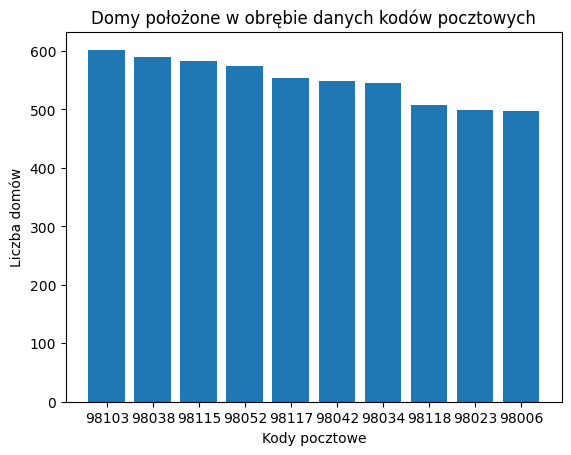

In [12]:
kody = df.groupby("zipcode").id.agg("count").reset_index()
kody = kody.sort_values('id', ascending = False)
kody = kody[0:10]
kody['zipcode'] = kody['zipcode'].astype(str)
plt.bar(kody["zipcode"], kody["id"])
plt.title("Domy położone w obrębie danych kodów pocztowych")
plt.ylabel("Liczba domów")
plt.xlabel("Kody pocztowe")
plt.show()

b)

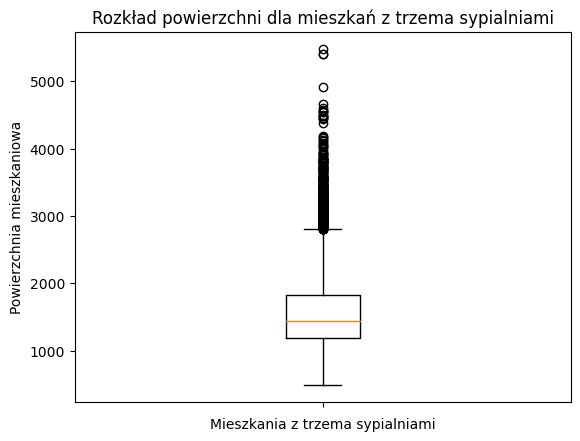

In [59]:
dfb = df.loc[df.bedrooms == 3]
dfb
plt.boxplot(dfb["sqft_above"])
plt.title("Rozkład powierzchni dla mieszkań z trzema sypialniami")
plt.ylabel("Powierzchnia mieszkaniowa")
plt.xlabel("Mieszkania z trzema sypialniami")
plt.xticks([1], [])
plt.show()

c)

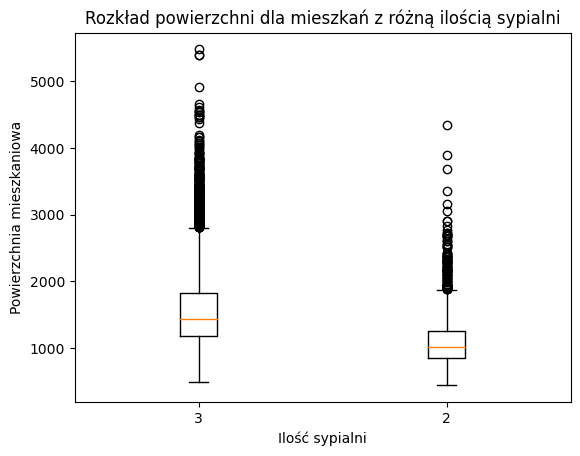

In [60]:
dfc1 = df.loc[df.bedrooms == 3]
dfc1
data_1 = dfc1["sqft_above"]
dfc2 = df.loc[df.bedrooms == 2]
dfc2
data_2 = dfc["sqft_above"]
data = [data_1, data_2]
plt.boxplot(data)
plt.xlabel("Ilość sypialni")
plt.ylabel("Powierzchnia mieszkaniowa")
plt.title("Rozkład powierzchni dla mieszkań z różną ilością sypialni")
plt.xticks([1, 2], [3, 2])
plt.show()